In [53]:
!pip install scikit-learn

In [54]:
#Importing needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [55]:
#Loading the dataset
listings_df = pd.read_csv(r"C:\Users\User\Desktop\EDA Tasks CSVs\listings.csv")

# Exploring the dataset and  Print the first 5 rows
listings_df.head()

In [56]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [57]:
# Print The Dataset shape
listings_df.shape

(3818, 92)

In [58]:
#summarize numericall features eg int64
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [59]:
# Summary statistics of categorical features which is objects
listings_df.describe(include = 'object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3816,3816,3816,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818,3818,3817,3818,3818,3818,3818,2009,1517,1866,2788,3818,3818,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,115,2,2,1442,81,87,17,7,2,28,1,7,1,1,2,16,3,5,3284,273,395,356,46,118,45,34,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/241032,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a1.muscache.com/ac/pictures/67560560/c...,https://a0.muscache.com/ac/pictures/14409893/f...,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,t,House,Entire home/apt,Real Bed,{},$150.00,$500.00,"$2,500.00",$100.00,$50.00,$0.00,today,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,1,1,1,1,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,595,3809,2997,30,351,397,794,3810,3817,420,3818,3810,3818,3818,3412,1733,2541,3657,45,162,94,66,348,310,2048,706,3818,3818,25,94,3818,3818,3227,1417,3497,3443


In [60]:
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [61]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Data Cleaning

In [62]:
# Drop duplicate columns
listings_df = listings_df.T.drop_duplicates().T

In [63]:
listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is m

In [64]:
# Drop columns with full NA
listings_df.dropna(axis=1, how='all', inplace=True)

In [65]:
# Drop columns with only one unique value
listings_df.drop([c for c in listings_df.columns if listings_df[c].nunique()==1], axis=1, inplace=True)

In [66]:
listings_df.head(2)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48


In [67]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                3818 non-null   object
 1   listing_url                       3818 non-null   object
 2   name                              3818 non-null   object
 3   summary                           3641 non-null   object
 4   space                             3249 non-null   object
 5   description                       3818 non-null   object
 6   neighborhood_overview             2786 non-null   object
 7   notes                             2212 non-null   object
 8   transit                           2884 non-null   object
 9   thumbnail_url                     3498 non-null   object
 10  medium_url                        3498 non-null   object
 11  picture_url                       3818 non-null   object
 12  xl_picture_url      

In [68]:
# Drop columns representing url
listings_df.drop(listings_df.columns[listings_df.columns.str.contains("url")], axis=1, inplace=True)

In [69]:
# Reformat the money related columns
listings_df.price = listings_df.price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.weekly_price = listings_df.weekly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.monthly_price = listings_df.monthly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.security_deposit = listings_df.security_deposit.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.cleaning_fee = listings_df.cleaning_fee.str.replace(r"$", "").str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.extra_people = listings_df.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

In [70]:
# Dropping specified columns with high missing values
columns_to_drop = [
    'square_feet', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
]

# Dropping host-related information (selecting by pattern)
host_related_columns = listings_df.columns[listings_df.columns.str.contains('^host_')]
columns_to_drop.extend(host_related_columns)

# Dropping the columns
listings_df.drop(columns=columns_to_drop, inplace=True)

In [71]:
listings_df.head(3)

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,5 weeks ago,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15


In [72]:
# Listing the numerical and categorical columns
numerical_columns = listings_df.select_dtypes(exclude=object).columns.tolist()
categorical_columns = listings_df.select_dtypes(include=object).columns.tolist()

In [73]:
# Dealing With Null Values
# Numeric columns: Use median imputation
numeric_imputer = SimpleImputer(strategy='median')
listings_df[numerical_columns] = numeric_imputer.fit_transform(listings_df[numerical_columns])

# Categorical columns with mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
listings_df[categorical_columns] = categorical_imputer.fit_transform(listings_df[categorical_columns])

# EDA

In [74]:
listings_df.head(2)

,id,name,description,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,650.0,2200.0,250.0,50.0,2,5.0,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48


In [75]:
# Summary statistics for price
listings_df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250107
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [80]:
listings_df['weekly_price'].describe()

count    3818.000000
mean      722.867981
std       392.263275
min       100.000000
25%       620.000000
50%       650.000000
75%       671.500000
max      6300.000000
Name: weekly_price, dtype: float64

In [81]:
listings_df['monthly_price'].describe()

count     3818.000000
mean      2364.230225
std       1104.082153
min        500.000000
25%       2200.000000
50%       2200.000000
75%       2200.000000
max      19500.000000
Name: monthly_price, dtype: float64

In [82]:
# Average number of bedrooms
listings_df['bedrooms'].mean()

np.float64(1.3072289156626506)

In [83]:
# Average number of bathrooms
listings_df['bathrooms'].mean()

np.float64(1.2583813514929283)

In [84]:
# Average review scores rating
listings_df['review_scores_rating'].mean()

np.float64(95.46464117338921)

In [85]:
# Estimating occupancy rates
average_annual_availability = listings_df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate

np.float64(32.938998399793334)

In [98]:
listings_df['property_type'].value_counts()

property_type
House              1734
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

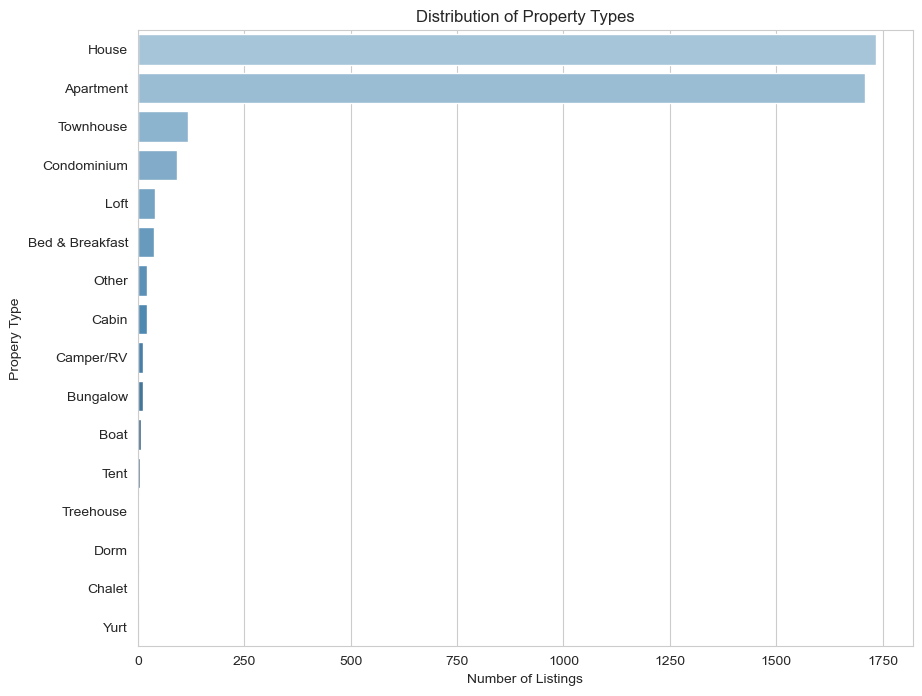

In [100]:
# Distribution of Property Types
sns.set_style("whitegrid")  # Set the aesthetic style of the plots

# Calculate teh distribution of the property types
property_type_counts = listings_df['property_type'].value_counts()

# Create a bar chart for the distribution of propery types
plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="Blues_d")
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.show()

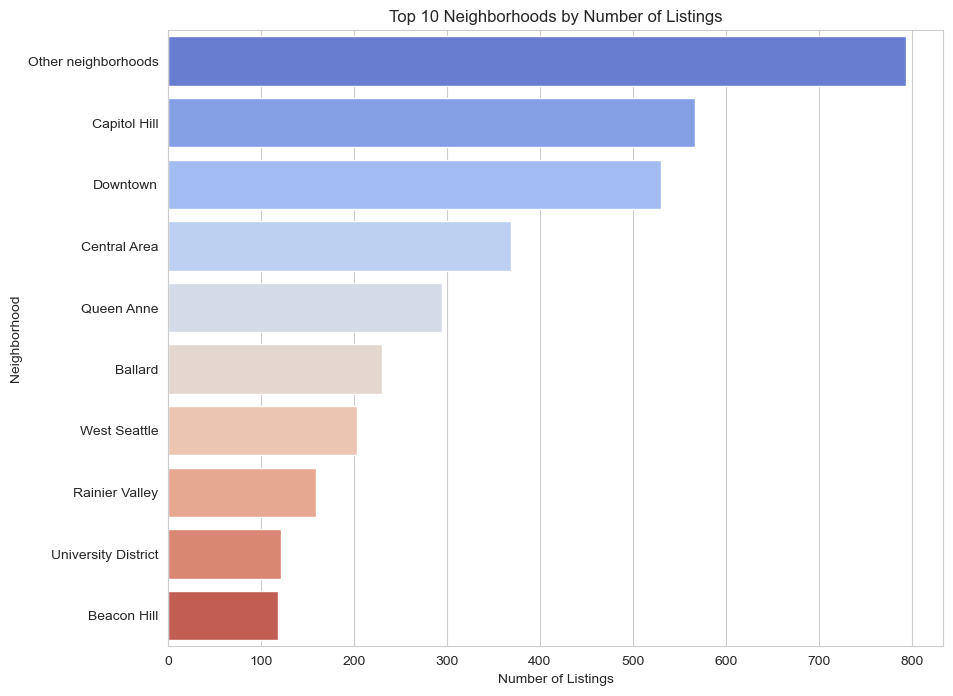

In [102]:
# Distribution of Neighborhoods
neighborhood_counts = listings_df['neighbourhood_group_cleansed'].value_counts().head(10) # Calculate the distribution of listings by neighborhood

# Create a bar chart for the top neighborhoods with the most listings
plt.figure(figsize=(10, 8))
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="coolwarm")
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

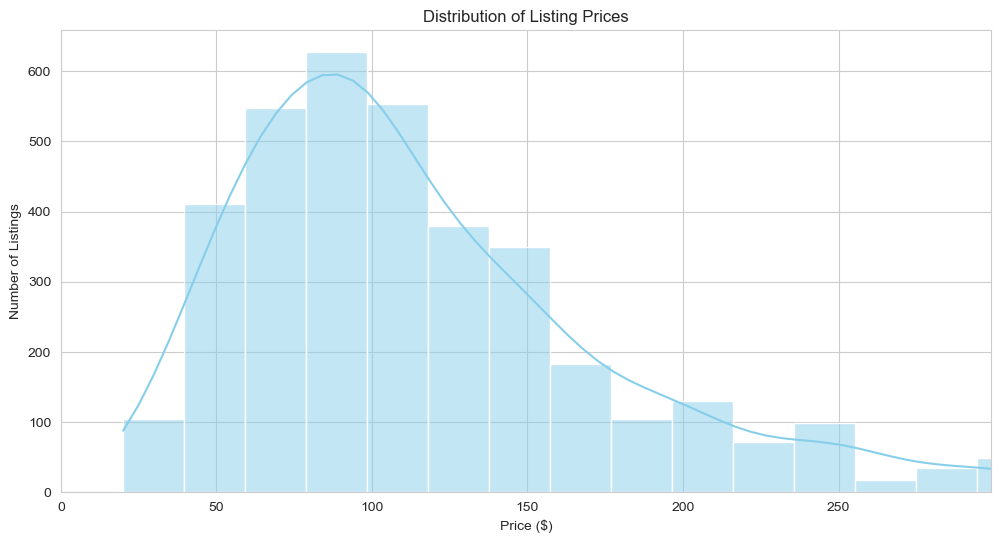

In [104]:
# Price Distribution
plt.figure(figsize=(12, 6))
sns.histplot(listings_df['price'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, listings_df['price'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

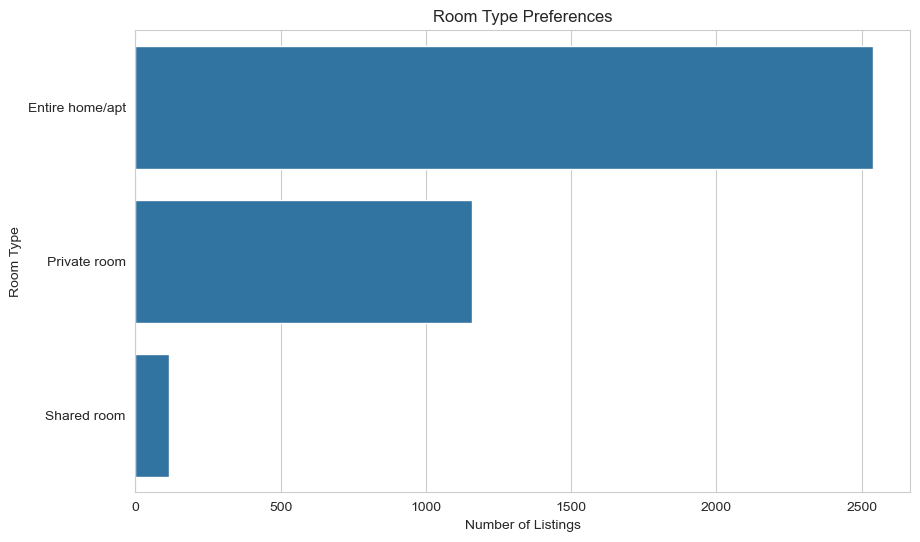

In [105]:
# Room Type Preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=listings_df, y='room_type', order=listings_df['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

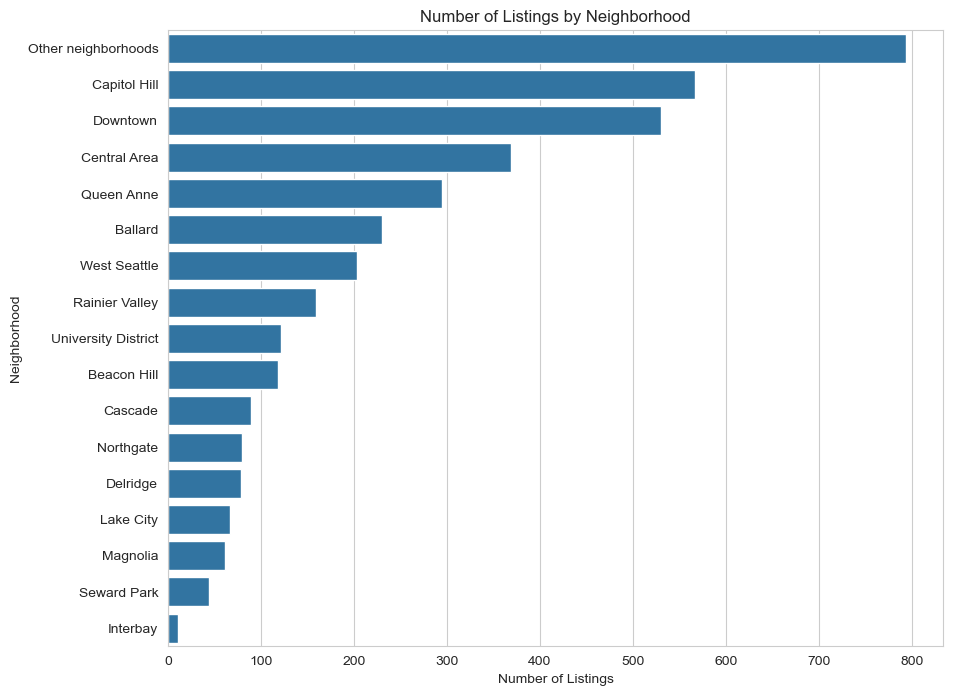

In [106]:
# Number of Listings by Neighborhood
plt.figure(figsize=(10, 8))
sns.countplot(data=listings_df, y='neighbourhood_group_cleansed', order=listings_df['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

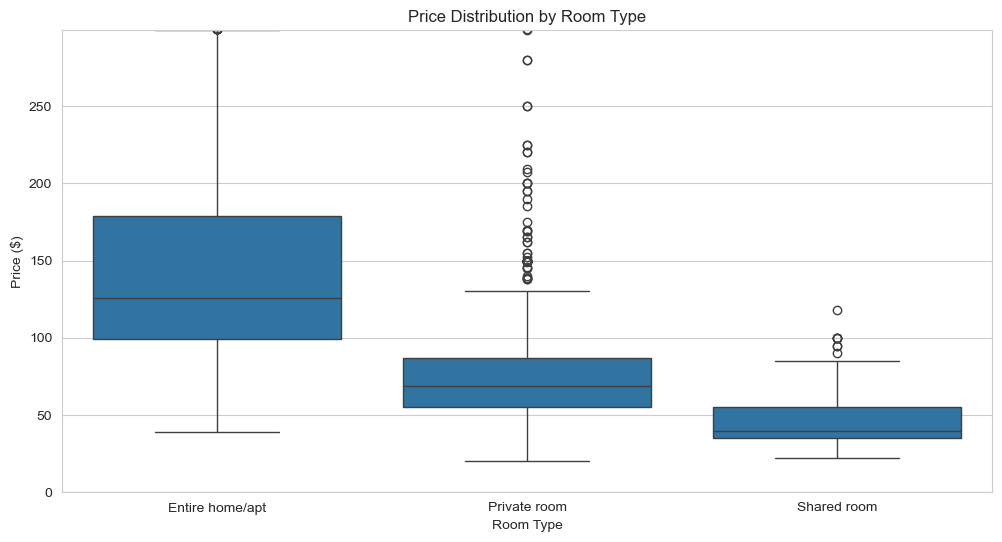

In [107]:
# Price by Room Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, listings_df['price'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visualization
plt.show()

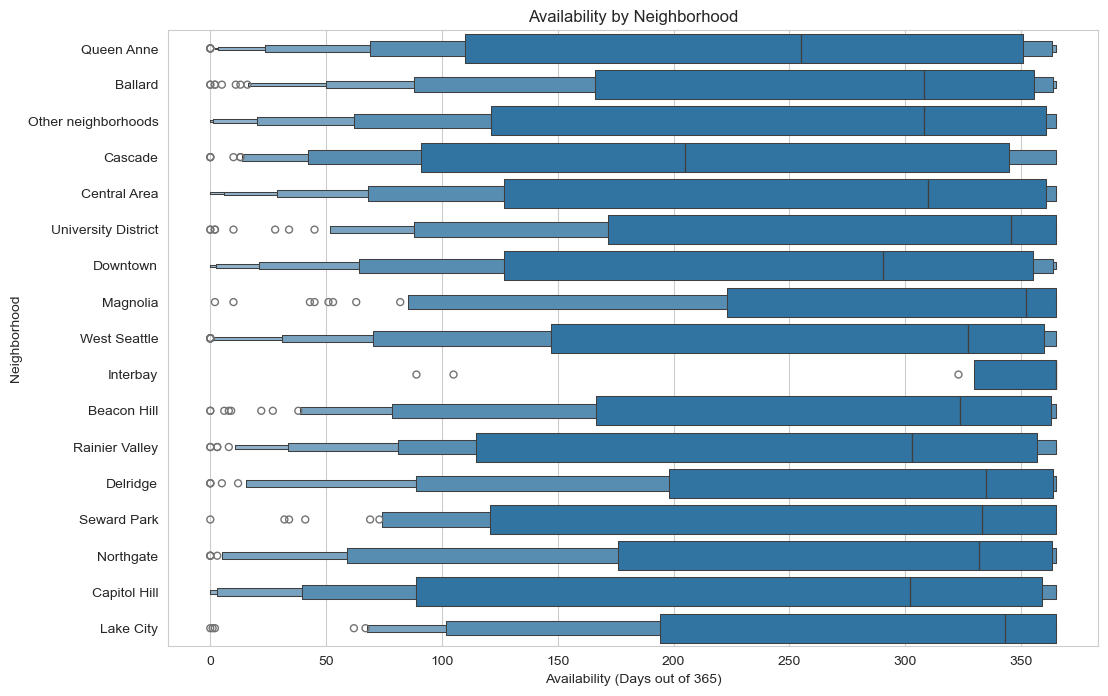

In [108]:
# Availability by Neighborhood
plt.figure(figsize=(12, 8))
sns.boxenplot(y='neighbourhood_group_cleansed', x='availability_365', data=listings_df)
plt.title('Availability by Neighborhood')
plt.xlabel('Availability (Days out of 365)')
plt.ylabel('Neighborhood')
plt.show()

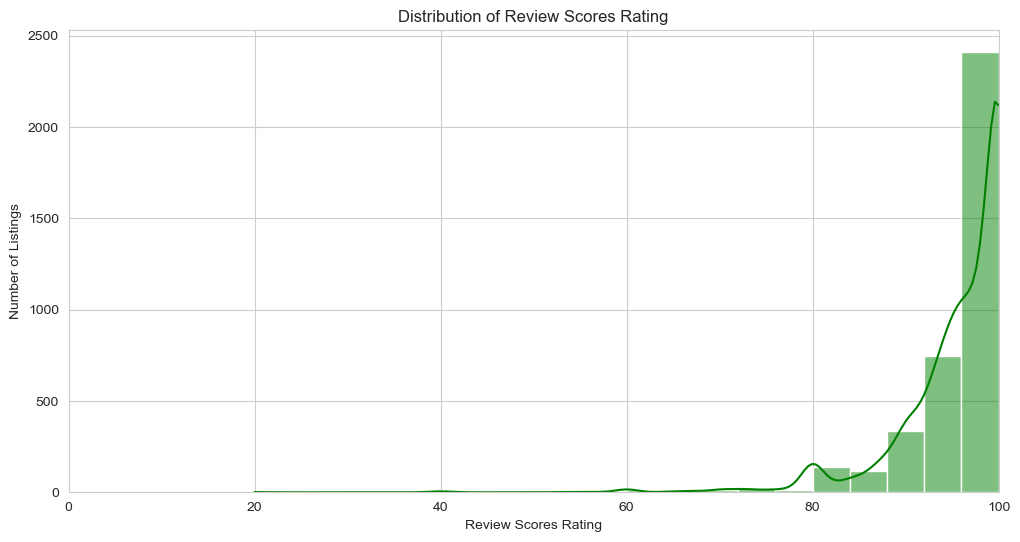

In [109]:
# Review Scores Rating Distribution
plt.figure(figsize=(12, 6))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)  # Review scores are typically on a scale from 0 to 100
plt.show()

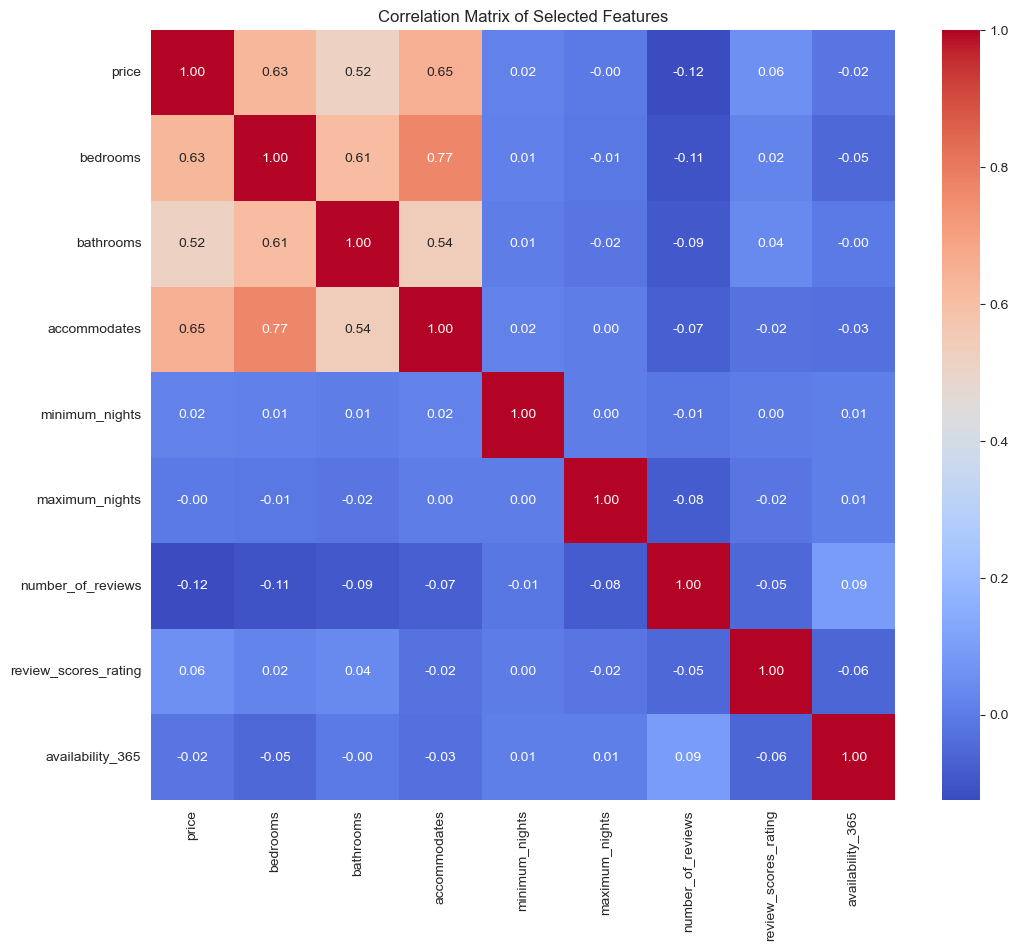

In [110]:
# Select relevant numerical columns for correlation analysis
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]
# but all of these features are in the object type, so we need to convert them
for col in numerical_columns:
    listings_df[col] = pd.to_numeric(listings_df[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = listings_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


# Data Insights
Price and Accommodation Features:
The typical price, for properties varies widely ranging from  20 to 1000 with an average of $128. 
This shows that there is a range of options to suit different budgets.
Most properties are priced towards the lower to mid range. There are also quite a few priced listings leading to a right skewed distribution.
A noticeable trend is the connection between price and both the number of bedrooms (0.63) and the capacity, for guests (0.65) indicating that larger accommodations tend to come with price tags.

Property and Room Types:
When it comes to properties and the types of rooms available you'll find that houses and apartments are the choices, on Airbnb. This reflects a blend of what travelers prefer. A mix of accommodation and cozy, home like experiences.
Looking at the room preferences it's clear that most guests lean towards booking homes or apartments followed by private rooms. This suggests that privacy and having space are priorities for travelers.
In terms of pricing based on room type it's evident that entire homes or apartments tend to have prices compared to shared rooms. This aligns with the idea that people're willing to pay more, for privacy and spacious accommodations.

Neighborhood Popularity:
Capitol Hill, Downtown and the Central Area stand out as the sought, after neighborhoods based on the number of listings. This suggests they are quite popular among visitors. Looking at the availability data for each neighborhood it appears that some areas have short term rentals which could indicate either a higher turnover rate or lower demand. On the hand neighborhoods with availability might be more desirable or attract longer term guests. The average review scores are notably high 95 out of 100 showcasing guest satisfaction. This positive feedback likely plays a role, in drawing visitors to Airbnb listings in these neighborhoods.

Occupancy and Availability:
The estimated annual occupancy rate of about 33% provides a baseline understanding of how often properties are booked. This figure will vary greatly by neighborhood and property type. Availability seems to vary significantly between neighborhoods, suggesting localized differences in demand or seasonality that could influence hosts' pricing strategies.

Correlation Insights:
The correlation matrix reveals several expected relationships, such as the strong positive correlation between the number of bedrooms/bathrooms and the accommodation capacity. Interestingly, the number of reviews has a slightly negative correlation with price (-0.12), possibly indicating that more expensive listings attract fewer reviews, or that guests are less inclined to leave reviews for higher-priced stays. Minimum nights required for a booking show very little correlation with other features, indicating that this policy is likely set independently of the property’s characteristics or price.